In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [13]:
data=pd.read_csv("/content/student-mat.csv", sep=',')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [16]:
data["G"] = (data["G1"] + data["G2"] + data["G3"]) / 3
data["G"] = data["G"].round()
def des(x) :
    if x<4 :
        return "DROPOUT"
    elif x<8 :
        return "SAVEABLE"
    elif x<12 :
        return "AVERAGE"
    elif x<16 :
        return "AUTONOMOUS"
    elif x<20 :
        return "SCHOLARSHIP-ISH"
data["target"] = data["G"].apply(des)

In [17]:
data.drop(["G1","G2","G3","Mjob","Fjob", "school","reason","guardian","paid"],axis = 1, inplace = True)

In [18]:
data.isnull().sum()

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G             0
target        0
dtype: int64

In [19]:
target_group = data.groupby('target').mean()
target_group

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G
target,,,,,,,,,,,,,,
AUTONOMOUS,16.575758,2.856061,2.636364,1.371212,2.098485,0.128788,3.863636,3.272727,3.000000,1.439394,2.174242,3.568182,5.015152,13.386364
AVERAGE,16.761290,2.619355,2.425806,1.490323,2.019355,0.354839,4.025806,3.200000,3.129032,1.580645,2.490323,3.567742,7.245161,9.561290
DROPOUT,16.818182,2.454545,2.272727,2.000000,1.545455,0.818182,4.454545,3.636364,4.000000,1.181818,1.818182,4.181818,0.000000,2.181818
SAVEABLE,16.920635,2.571429,2.333333,1.460317,1.952381,0.793651,3.746032,3.190476,3.301587,1.523810,2.396825,3.555556,4.952381,5.634921
SCHOLARSHIP-ISH,16.411765,3.352941,2.941176,1.352941,2.176471,0.029412,4.088235,3.205882,2.794118,1.205882,1.794118,3.235294,4.647059,17.147059


In [20]:
def des(x) :
    if x<4 :
        return "DROPOUT"
    elif x<8 :
        return "SAVEABLE"
    elif x<12 :
        return "AVERAGE"
    elif x<16 :
        return "AUTONOMOUS"
    elif x<20 :
        return "SCHOLARSHIP-ISH"
data["target"] = data["G"].apply(des)

In [21]:
data["walc"] = data["Walc"] + data["Dalc"]
data['sex']=data['sex'].map({'M':0,'F':1})
data['address']=data['address'].map({'U':0,'R':1})
data['famsize']=data['famsize'].map({'LE3':0,'GT3':1})
data['Pstatus']=data['Pstatus'].map({'A':0,'T':1})
data['schoolsup']=data['schoolsup'].map({'no':0,'yes':1})
data['activities']=data['activities'].map({'no':0,'yes':1})
data['nursery']=data['nursery'].map({'no':0,'yes':1})
data['higher']=data['higher'].map({'no':0,'yes':1})
data['internet']=data['internet'].map({'no':0,'yes':1})
data['romantic']=data['romantic'].map({'no':0,'yes':1})
data['famsup']=data['famsup'].map({'no':0,'yes':1})
data

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G,target,walc
0,1,18,0,1,0,4,4,2,2,0,1,0,0,1,1,0,0,4,3,4,1,1,3,6,6.0,SAVEABLE,2
1,1,17,0,1,1,1,1,1,2,0,0,1,0,0,1,1,0,5,3,3,1,1,3,4,5.0,SAVEABLE,2
2,1,15,0,0,1,1,1,1,2,3,1,0,0,1,1,1,0,4,3,2,2,3,3,10,8.0,AVERAGE,5
3,1,15,0,1,1,4,2,1,3,0,0,1,1,1,1,1,1,3,2,2,1,1,5,2,15.0,AUTONOMOUS,2
4,1,16,0,1,1,3,3,1,2,0,0,1,0,1,1,0,0,4,3,2,1,2,5,4,9.0,AVERAGE,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,20,0,0,0,2,2,1,2,2,0,1,0,1,1,0,0,5,5,4,4,5,4,11,9.0,AVERAGE,9
391,0,17,0,0,1,3,1,2,1,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,15.0,AUTONOMOUS,7
392,0,21,1,1,1,1,1,1,1,3,0,0,0,0,1,0,0,5,5,3,3,3,3,3,8.0,AVERAGE,6
393,0,18,1,0,1,3,2,3,1,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11.0,AVERAGE,7


VISUALISATION


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


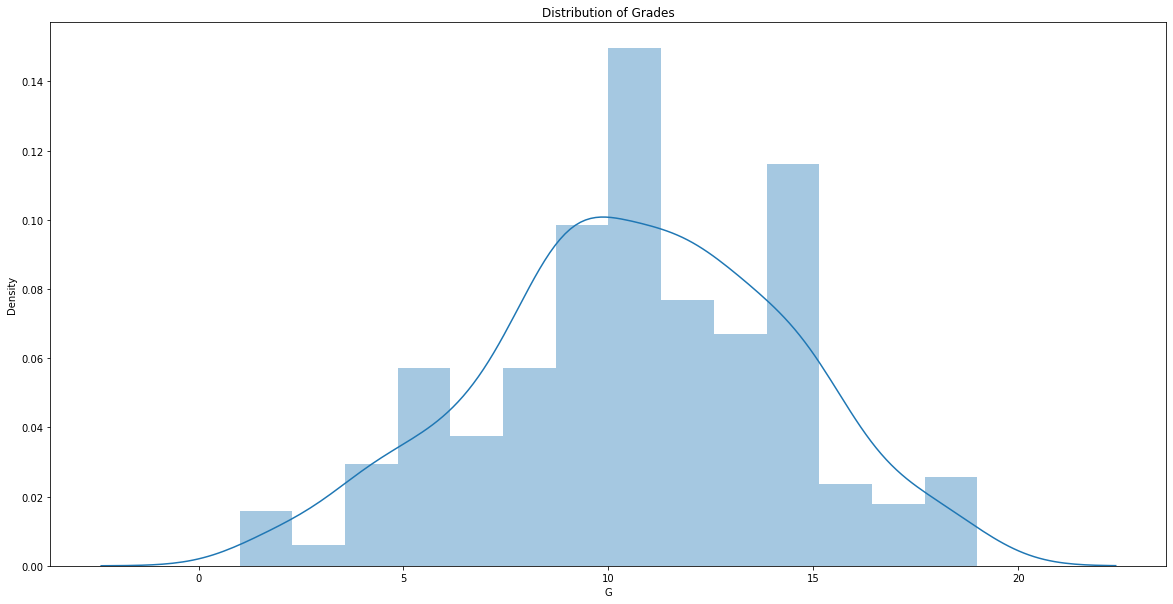

In [40]:
plt.figure(figsize=(20,10))
sns.distplot(data.G, kde=True).set_title('Distribution of Grades')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


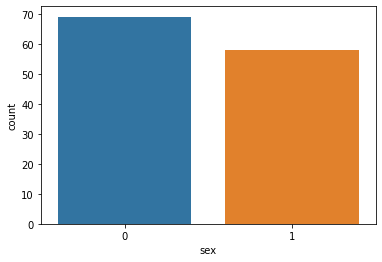

In [23]:
sns.countplot(data["sex"][data["G"]>12])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


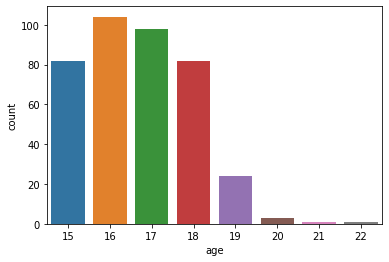

In [24]:
sns.countplot(data["age"])

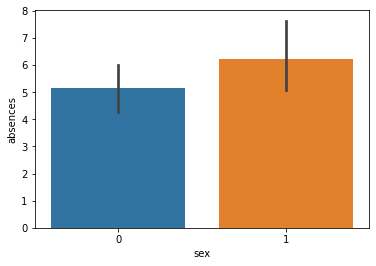

In [25]:
sns.barplot(x=data['sex'],y=data['absences'],data=data)

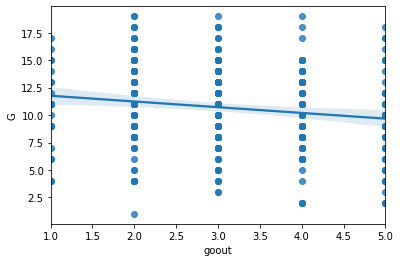

In [26]:
sns.regplot(x=data['goout'],y=data['G'],data=data)

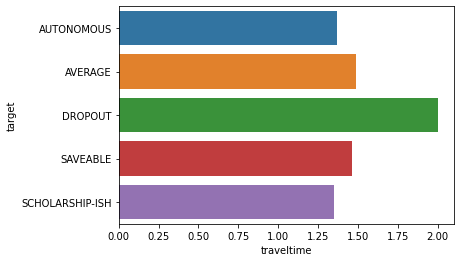

In [36]:
sns.barplot(x=target_group['traveltime'],y=target_group.index,data=target_group)

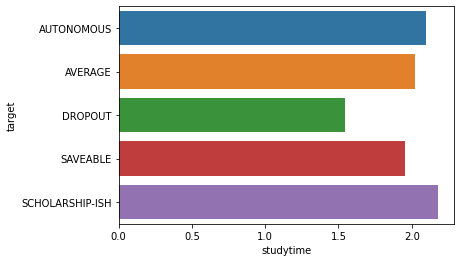

In [37]:
sns.barplot(x=target_group['studytime'],y=target_group.index,data=target_group)

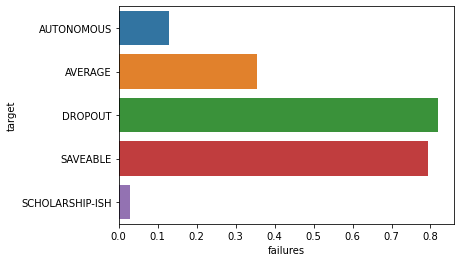

In [38]:
sns.barplot(x=target_group['failures'],y=target_group.index,data=target_group)

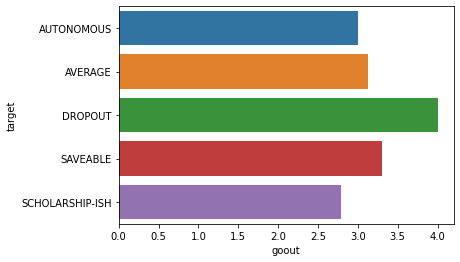

In [39]:
sns.barplot(x=target_group['goout'],y=target_group.index,data=target_group)

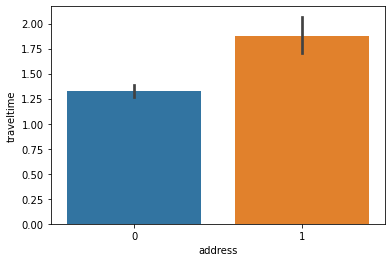

In [45]:
sns.barplot(x=data['address'],y=data['traveltime'],data=data)

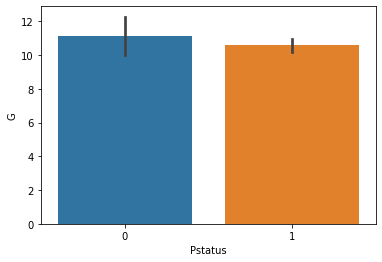

In [43]:
sns.barplot(x=data['Pstatus'],y=data['G'],data=data)

<Figure size 1440x2160 with 0 Axes>

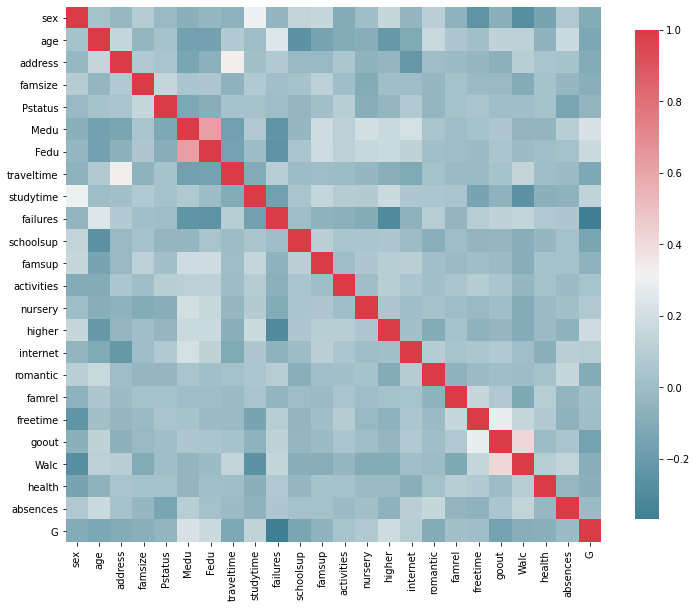

<Figure size 1440x2160 with 0 Axes>

In [ ]:
Z = data[["sex","age","address","famsize","Pstatus","Medu","Fedu","traveltime","studytime","failures","schoolsup","famsup","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Walc","health","absences","G"]].corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap( Z, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = False, annot_kws = { 'fontsize' : 12 } )
plt.figure(figsize = (20,30))

Feature selection

In [46]:
#Feature Selection
#We notice that most features are either logically important of have a big
#correlation with the Grade, we decide to pick all of them therefore


CLASSIFICATION

In [ ]:
#CLASSIFICATION
x = data[["sex","age","address","famsize","Pstatus","Medu","Fedu","traveltime","studytime","failures","schoolsup","famsup","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Walc","health","absences"]]
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=30)

In [ ]:
#Logistic Regression

log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Acuuracy logReg =',accuracy_score(y_test,y_pred))
print('F1 Score logReg =',f1_score(y_test,y_pred,average='weighted'))
scores = cross_val_score(log, x, y, cv=5) #scoring='f1_macro'
print("%0.2f accuracy with a standard deviation of %0.2f for logReg" % (scores.mean(), scores.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acuuracy logReg = 0.46464646464646464
F1 Score logReg = 0.457181610115928
0.38 accuracy with a standard deviation of 0.09 for logReg


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Knn Classifier

knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train) 
y_pred1 = knn.predict(x_test)  
print('Acuuracy knn =',accuracy_score(y_test,y_pred1))
print('F1 Score knn =',f1_score(y_test,y_pred,average='weighted'))
scores = cross_val_score(knn, x, y, cv=5) #scoring='f1_macro'
print("%0.2f accuracy with a standard deviation of %0.2f for knn" % (scores.mean(), scores.std()))

Acuuracy knn = 0.4444444444444444
F1 Score knn = 0.457181610115928
0.36 accuracy with a standard deviation of 0.04 for knn


In [ ]:
#Knn Normalized

scaler = StandardScaler()
nx = scaler.fit_transform(x)
x_train1, x_test1, y_train1, y_test1 = train_test_split (nx,y, test_size=0.2 ,random_state=30 )
knn.fit(x_train1,y_train1)
y_pred2 = knn.predict(x_test1)
print('Accuracy knn normalized : ', accuracy_score(y_test1,y_pred2))
print('f1_score knn normalized : ', f1_score(y_test1,y_pred2, average="weighted"))
scores = cross_val_score(knn, nx, y, cv=5) 
print("%0.2f accuracy with a standard deviation of %0.2f for knn normalized" % (scores.mean(), scores.std()))

Accuracy knn normalized :  0.43037974683544306
f1_score knn normalized :  0.36880359330338913
0.38 accuracy with a standard deviation of 0.06 for knn normalized


In [ ]:
#SVM

model = svm.SVC(kernel='poly')
model.fit(x_train,y_train)
y_pred3 = model.predict(x_test)
print('Accuracy SVM : ', accuracy_score(y_test,y_pred3))
print('f1_score SVM : ', f1_score(y_test,y_pred3,average='weighted'))
scores = cross_val_score(model, x, y, cv=5) 
print("%0.2f accuracy with a standard deviation of %0.2f for svm" % (scores.mean(), scores.std()))

Accuracy SVM :  0.40404040404040403
f1_score SVM :  0.33041691788928335
0.36 accuracy with a standard deviation of 0.03 for svm


In [ ]:
#Decision Tree

model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred4 = model2.predict(x_test)
print('Accuracy : ', accuracy_score(y_test,y_pred4))
print('f1_score : ', f1_score(y_test,y_pred4, average='weighted'))
scores = cross_val_score(model2, x, y, cv=5) 
print("%0.2f accuracy with a standard deviation of %0.2f for decision tree" % (scores.mean(), scores.std()))

Accuracy :  0.2222222222222222
f1_score :  0.22520722567929494
0.31 accuracy with a standard deviation of 0.05 for decision tree


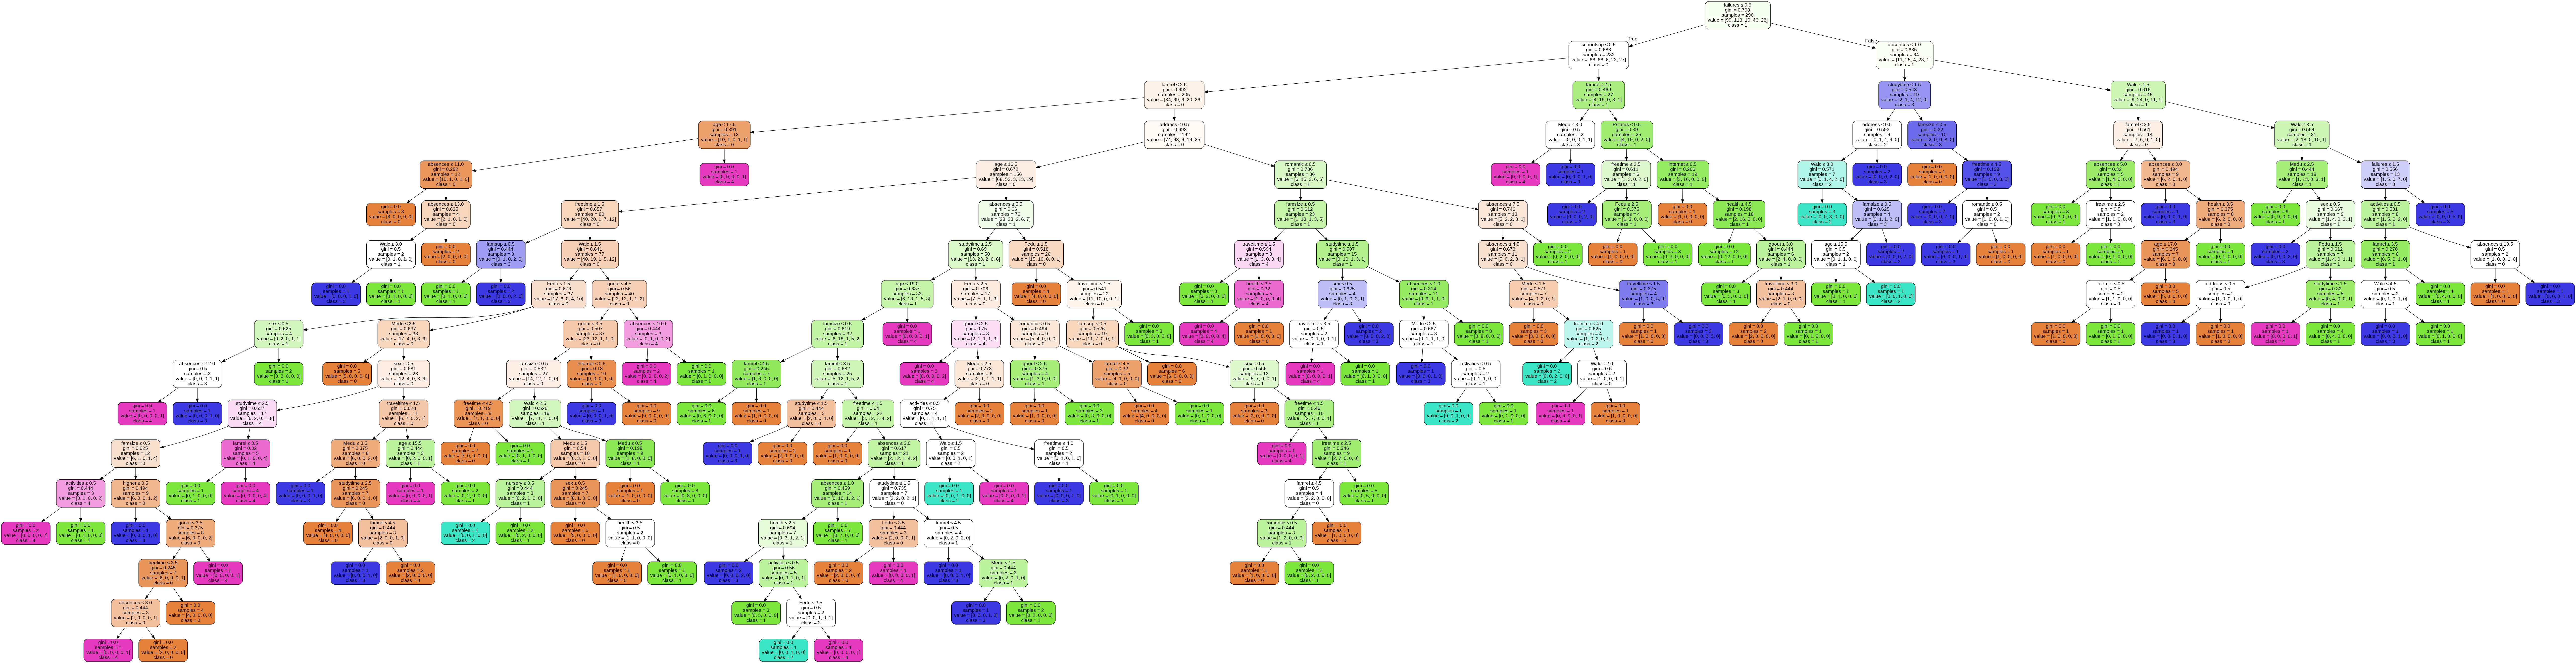

In [ ]:
dot_data = StringIO()
feature_cols = x
export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ["sex","age","address","famsize","Pstatus","Medu","Fedu","traveltime","studytime","failures","schoolsup","famsup","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Walc","health","absences"],class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

In [ ]:
#Random Forest

model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred5 = model3.predict(x_test)

print('Accuracy : ', accuracy_score(y_test,y_pred5))
print('f1_score : ', f1_score(y_test,y_pred5, average = 'weighted'))
scores = cross_val_score(model3, x, y, cv=5) 
print("%0.2f accuracy with a standard deviation of %0.2f for RANDOM FOREST" % (scores.mean(), scores.std()))

Accuracy :  0.494949494949495
f1_score :  0.4588470489205783
0.39 accuracy with a standard deviation of 0.05 for RANDOM FOREST


In [ ]:
#PCA

from sklearn.decomposition import PCA
X = x
pca = PCA(n_components=6)
data=pca.fit_transform(X)

In [ ]:
dfn = pd.DataFrame(data ,  columns=['pca1' , 'pca2','pca3','pca4','pca5','pca6'])
dfn

,pca1,pca2,pca3,pca4,pca5,pca6
0,0.328383,-0.973902,-0.259770,1.194056,1.987959,0.112379
1,-1.761504,0.102634,2.345619,-0.629194,-0.143917,-1.214711
2,4.239754,0.568064,1.592664,-0.917860,-2.712650,-0.338632
3,-3.769340,-2.276423,-0.493668,-1.878904,-0.432200,0.777036
4,-1.749022,-0.903308,-0.738141,-1.595424,0.082968,0.498953
...,...,...,...,...,...,...
390,5.423464,4.263612,0.094464,0.732607,1.778342,-0.359681
391,-2.636511,2.280120,0.069763,2.417138,-1.537675,0.239915
392,-2.599173,4.186710,2.847040,0.530365,2.371225,-0.685721
393,-5.653618,1.825618,-0.185750,-1.164716,0.439504,1.499571


In [ ]:
#KNN AFTER PCA
x1_train,x1_test,y1_train,y1_test = train_test_split(dfn,y, test_size=.3 ,random_state=30 )
model6 = KNeighborsClassifier(n_neighbors=15)
model6.fit(x_train1,y_train1)
y_pred6 = model6.predict(x_test1)

print('Accuracy : ', accuracy_score(y_test1,y_pred6))
print('f1_score : ', f1_score(y_test1,y_pred6 ,average='weighted' ))
scores = cross_val_score(model6, dfn, y, cv=5) 
print("%0.2f accuracy with a standard deviation of %0.2f for KNN AFTER PCA" % (scores.mean(), scores.std()))

Accuracy :  0.45569620253164556
f1_score :  0.4069489425995017
0.37 accuracy with a standard deviation of 0.06 for KNN AFTER PCA


In [ ]:
#REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error , r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

REGRESSION (FACULTATIF)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x.values,data["G"].values,test_size=0.25,random_state=30)

IndexError: ignored

In [ ]:
#XGB

xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print("train Accuracy : ",xgb.score(x_train,y_train))
print("test Accuracy : ",xgb.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

TypeError: ignored

In [ ]:
#Random Forest regressor
regr = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=80 ,min_samples_leaf=1 ,min_samples_split=2,random_state=0)
model=regr.fit(x_train,y_train)
pred=regr.predict(x_test)
print("train Accuracy : ",regr.score(x_train,y_train))
print("test Accuracy : ",regr.score(x_test,y_test))
print("test R squared",r2_score(y_test, pred))
print("test MSE",mean_squared_error(y_test, pred))

ValueError: ignored